In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{: .3f}'.format(x))

from subprocess import check_output

In [6]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


SalePrice  - 施設の売却価格（ドル）。これは予測しようとしているターゲット変数です。    
MSSubClass：建物クラス    
MSZoning：一般的なゾーニング分類      
LotFrontage：不動産に接続されている通りの直線フィート    
LotArea：ロットサイズ（平方フィート）    
Street：道路アクセスの種類    
Alley：路地アクセスの種類    
LotShape：資産の一般的な形状    
LandContour：物件の平坦度    
Utilities：利用可能なユーティリティの種類    
LotConfig：ロット構成    
LandSlope：土地の傾斜    
Neighborhood：Ames市域内の物理的な場所    
Condition1：幹線道路または鉄道への近接    
Condition2：幹線道路または鉄道への近さ（秒がある場合）    
BldgType：住居の種類    
HouseStyle：住まいのスタイル    
OverallQual：全体的な素材と仕上げの品質    
OverallCond：全体的なコンディション評価    
YearBuilt：元の建設日    
YearRemodAdd：改造日    
RoofStyle：屋根の種類    
RoofMatl：屋根材    
Exterior1st：家の外装    
Exterior2nd：家の外装材（複数の素材がある場合）    
MasVnrType：石積みのベニヤタイプ    
MasVnrArea：メーソンリーベニアの面積（平方フィート）    
ExterQual：外装材の品質    
ExterCond：外装上の材料の現状    
MasVnrType：財団の種類    
BsmtQual：地下室の高さ    
BsmtCond：地下室の概況    
Foundation：ストライキまたは庭レベルの地下壁    
BsmtFinType1：地下室仕上がり面積    
BsmtFinSF1：タイプ1仕上げ平方フィート    
BsmtFinType2：2番目に完成した領域の品質（存在する場合）    
BsmtFinSF2：タイプ2仕上げ平方フィート    
BsmtUnfSF：地下1平方フィート    
TotalBsmtSF：地下室の総平方フィート    
Heating：暖房の種類    
HeatingQC：暖房の品質と状態    
CentralAir：セントラルエアコン    
Electrical：電気システム    
1stFlrSF：1階平方フィート    
2ndFlrSF：2階平方フィート    
LowQualFinSF：低品質仕上げ平方フィート（全フロア）    
GrLivArea：上階（地面）のリビングエリア平方フィート    
BsmtFullBath：地下フルバスルーム    
BsmtHalfBath：地下ハーフバスルーム    
FullBath：グレード以上のフルバスルーム    
HalfBath：グレード以上のハーフバス    
Bedroom：地下室より上の寝室の数    
Kitchen：キッチンの数    
KitchenQual：キッチンの質    
TotRmsAbvGrd：グレード以上の総客室数（バスルームは含まれません）    
Functional：家庭用機能性評価    
Fireplaces：暖炉の数    
FireplaceQu：暖炉の品質    
GarageType：ガレージの場所    
GarageYrBlt：年式ガレージが建てられました    
GarageFinish：ガレージの内部仕上げ    
GarageCars：自動車容量のガレージサイズ    
GarageArea：ガレージサイズ（平方フィート）    
GarageQual：ガレージ品質    
GarageCond：ガレージ状態    
PavedDrive：舗装された私道    
WoodDeckSF：ウッドデッキ面積（平方フィート）    
OpenPorchSF：オープンポーチ面積（平方フィート）    
EnclosedPorch：囲まれたポーチの面積（平方フィート）    
3SsnPorch：3平方フィートの3シーズンポーチ面積    
ScreenPorch：スクリーンポーチの面積（平方フィート）    
PoolArea：プール面積（平方フィート）    
PoolQC：プール品質    
Fence：フェンスの品質    
MiscFeature：他のカテゴリに含まれていないその他の機能    
MiscVal：$その他の機能の価値    
MoSold：月売れ    
YrSold：販売年    
SaleType：販売の種類    
SaleCondition：販売条件    

## データ処理

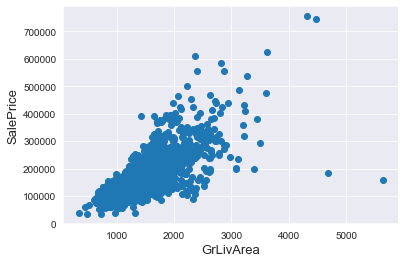

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

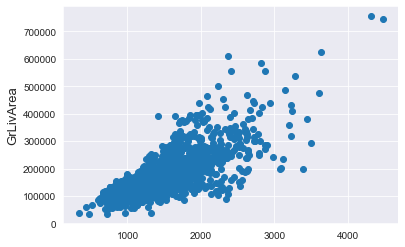

In [10]:
# 右下に外れ値となるデータがあるため削除

# 外れ値の削除は必ずするべき
# トレーニングデータにはおそらく他の外れ値はある。テストデータに異常値がある場合、
# それらを全て削除するとモデルに悪影響が出るためそれらの全てを削除するわけではない。
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.ylabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



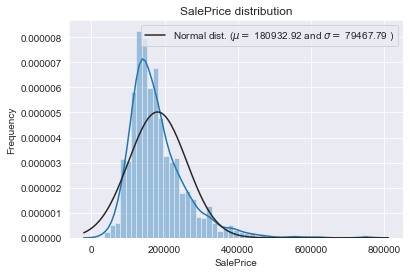

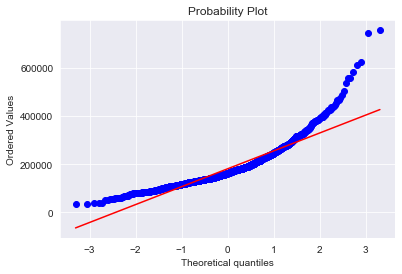

In [11]:
# 頻度を表すグラフと正規確率プロットを描画
# 正規確率プロットは一直線の場合正規分布
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

ターゲット変数は右に傾いている。    
モデルは正規分布データを好むので、この変数を変換してより正規分布にする必要があります


 mu = 12.02 and sigma = 0.40



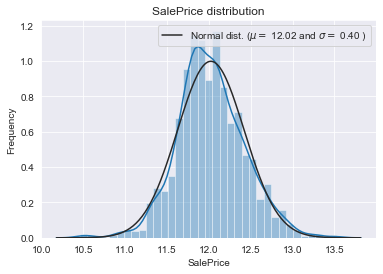

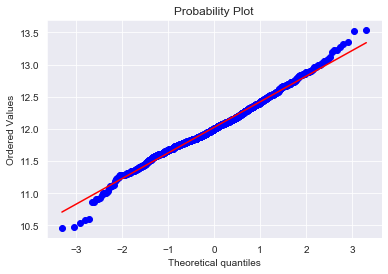

In [12]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


## 欠損値

In [14]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

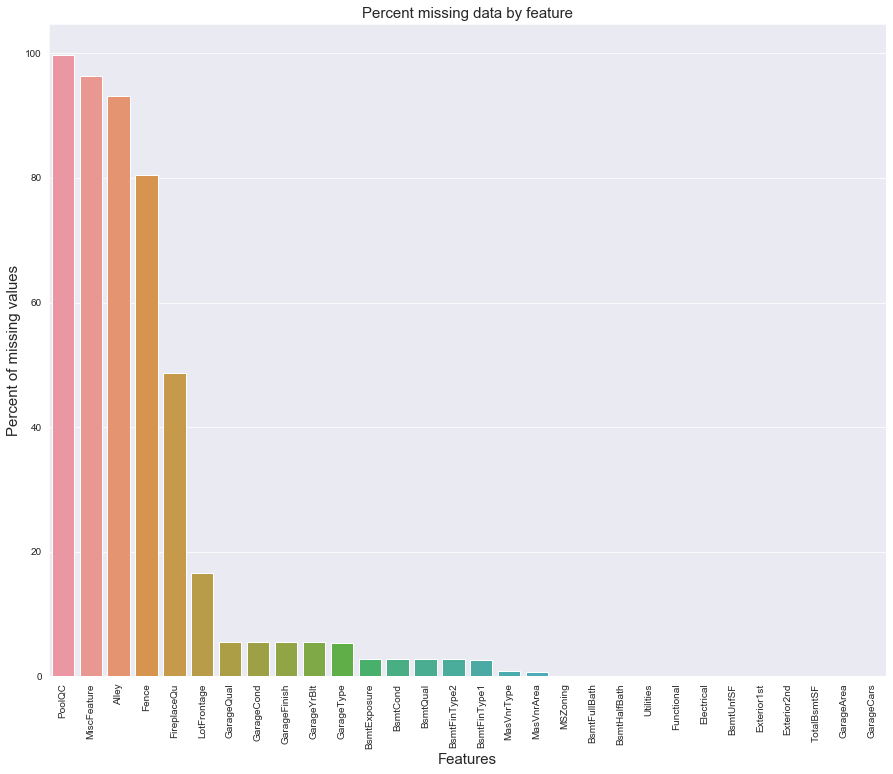

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

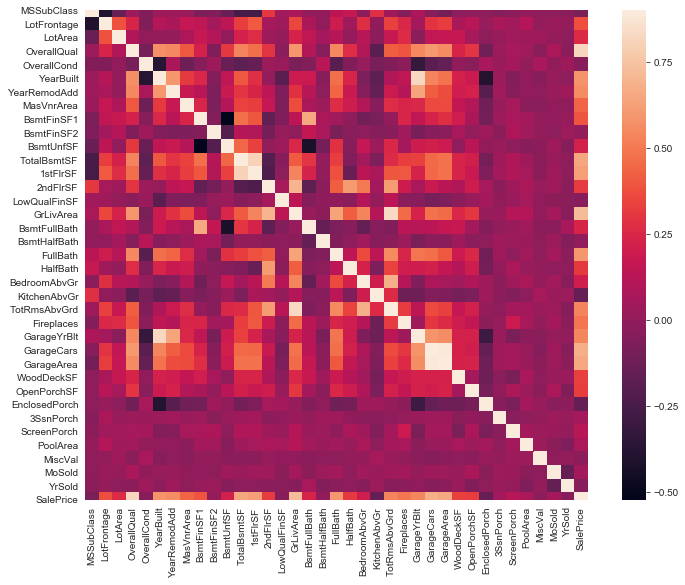

In [16]:
corrmat = train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [17]:
# ヒートマップから大多数の家にはプールがないことがわかる
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [18]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [19]:
# 大多数の家には路地のアクセスがない
all_data['Alley'] = all_data['Alley'].fillna('None')

In [20]:
# 大多数の家にはフェンスがない
all_data['Fence'] = all_data['Fence'].fillna('None')

In [21]:
# 大多数の家には暖炉がない
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [22]:
# 不動産に接続されている通りの直線フィートは、
# その近隣にある他の住宅とほぼ同じ面積を持つ可能性が高いため、近隣のLotFontageの中央値で欠損地を埋めることができる
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [24]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [25]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [26]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [27]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [28]:
all_data = all_data.drop(['Utilities'], axis=1)

In [29]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [30]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [31]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [32]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [33]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [34]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [35]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
GarageYrBlt,5.451
GarageCars,0.034
GarageArea,0.034


In [36]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [49]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

In [38]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,Normal,WD,0,Pave,8,856.000,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,Normal,WD,0,Pave,6,1262.000,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,Normal,WD,0,Pave,6,920.000,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,Abnorml,WD,0,Pave,7,756.000,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,Normal,WD,0,Pave,9,1145.000,192,2000,2000,2008


In [39]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [40]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945
BsmtHalfBath,3.930


In [41]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 33 skewed numerical features to Box Cox transform


In [42]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 338)


In [43]:
all_data.drop(all_data.columns[np.isnan(all_data).any()], axis=1)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,11.693,11.686,0.000,1.541,11.170,0.000,0.730,0.000,7.483,0.000,...,0,0,1,0,1,0,0,1,0,0
1,12.792,0.000,0.000,1.541,12.063,0.000,0.000,0.730,8.898,0.000,...,0,0,1,0,1,0,1,0,0,0
2,11.892,11.725,0.000,1.541,10.200,0.000,0.730,0.000,9.917,0.000,...,0,0,1,0,1,0,0,1,0,0
3,12.014,11.354,0.000,1.541,8.274,0.000,0.730,0.000,10.468,8.798,...,0,0,1,0,1,1,0,0,0,0
4,12.511,12.271,0.000,1.820,10.971,0.000,0.730,0.000,10.221,0.000,...,0,0,1,0,1,0,0,1,0,0
5,11.494,10.590,9.178,0.730,11.267,0.000,0.730,0.000,5.803,0.000,...,0,0,1,0,1,0,0,0,1,0
6,13.670,0.000,0.000,1.541,13.031,0.000,0.730,0.000,9.156,0.000,...,0,0,1,0,1,0,1,0,0,0
7,12.414,12.077,0.000,1.541,11.702,4.597,0.730,0.000,8.274,8.395,...,0,0,1,0,1,0,0,0,1,0
8,12.187,11.340,0.000,1.194,0.000,0.000,0.000,0.000,11.987,8.158,...,0,0,1,0,1,0,0,1,0,0
9,12.335,0.000,0.000,1.194,11.677,0.000,0.730,0.000,7.339,0.000,...,0,0,1,0,1,0,0,1,0,0


In [44]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [45]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
n_folds = 5

def rmsle_cv(model):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    return np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv=cv))

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [46]:
score = rmsle_cv(lasso)
print("lasso score:", score.mean())

NameError: name 'rmsle_cv' is not defined

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [48]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

NameError: name 'xgb' is not defined

In [ ]:
score = rmsle_cv(model_xgb)
print("xgb score:", score.mean())

In [ ]:
score = rmsle_cv(ENet)
print("xgb score:", score.mean())